In [253]:
#could explore more to figure out what dtype is and where it is suppose to come from

In [254]:
import pickle
with open('DMTS_8odors_5acids_allMice_raw_PerceptualData_forRick_122319.pkl', 'rb') as f:
        data = pickle.load(f)

In [178]:
import pandas as pd
len(data["data"][0]["odor_1st"].unique())
data_values = pd.concat(data["data"])
len(data_values["odor_2nd"].unique() & data_values["odor_1st"].unique() )

24

In [220]:
import keras
from mle_1g_test import build_model
import numpy as np
import matplotlib.pyplot as plt
import psiz
import tensorflow as tf
import plotly.graph_objects as go
import plotly

In [221]:
#reconstructed_model = psiz.models.load_model("saving_whole_model")

In [6]:
kinds_of_models = pickle.load(open("kinds_of_models.p", "rb"))

In [7]:
kinds_of_models

{'rho__beta_trainable': {'rho_trainable': True,
  'beta_trainable': True,
  'gamma_trainable': False,
  'tau_trainable': False},
 'beta_trainable': {'rho_trainable': False,
  'beta_trainable': True,
  'gamma_trainable': False,
  'tau_trainable': False},
 'all_trainable': {'rho_trainable': True,
  'beta_trainable': True,
  'gamma_trainable': True,
  'tau_trainable': True}}

In [8]:
models = {kind_of_model: build_model(24, 2, **kwargs) for kind_of_model, kwargs in kinds_of_models.items()}

In [9]:
models

{'rho__beta_trainable': <psiz.models.rate.Rate at 0x7fb510fa7b80>,
 'beta_trainable': <psiz.models.rate.Rate at 0x7fb510747280>,
 'all_trainable': <psiz.models.rate.Rate at 0x7fb510752730>}

In [10]:
for kind_of_model in models:
    models[kind_of_model].load_weights("weights_%s" % kind_of_model)

In [11]:
#1. Does not load embeddings but the line works
#This doesn't do much because embedding is already set to this, the models already know the dimensions
#models["all_trainable"].stimuli.embedding = tf.keras.layers.Embedding(25, 2, mask_zero=True)
#Example: rho_beta_true.stimuli.embedding = tf.keras.layers.Embedding(n_stimuli+1, n_dim, mask_zero=True)

In [12]:
#2. Does not work
#This approach does not work because it does not recognize "mask_zero"
#models["all_trainable"].stimuli.embedding(tf.keras.layers.Embedding, 25, 2, mask_zero=True)
#Example : #rho_beta_true.stimuli.embedding(tf.keras.layers.Embedding, n_stimuli+1, n_dim, mask_zero=True)

In [13]:
#3. Works but gives the same kind of error as number 4
#This is the error I get with this approach "AttributeError: 'str' object has no attribute 'base_dtype'"" but this approach does work as well
#models["all_trainable"].stimuli.embedding(tf.keras.layers.Embedding(25+1, 2, mask_zero=True))
# Example: rho_beta_true.stimuli.embedding(tf.keras.layers.Embedding(n_stimuli+1, n_dim, mask_zero=True))

In [14]:
models["all_trainable"].weights

[<tf.Variable 'beta:0' shape=() dtype=float32, numpy=1.0005667>,
 <tf.Variable 'gamma:0' shape=() dtype=float32, numpy=0.30184758>,
 <tf.Variable 'rho:0' shape=() dtype=float32, numpy=1.002886>,
 <tf.Variable 'tau:0' shape=() dtype=float32, numpy=1.2697594>,
 <tf.Variable 'lower:0' shape=() dtype=float32, numpy=0.014728185>,
 <tf.Variable 'upper:0' shape=() dtype=float32, numpy=0.7523214>,
 <tf.Variable 'midpoint:0' shape=() dtype=float32, numpy=0.50458354>,
 <tf.Variable 'rate:0' shape=() dtype=float32, numpy=3.7058692>]

In [15]:
#models["all_trainable"].stimuli.embedding(psiz.psiz.keras.layers.embeddings.EmbeddingLogNormalDiag)

In [16]:
# This "For user-defined classes which inherit from tf.keras.Model, Layer instances must be assigned to object attributes, typically in the constructor." 
# is why I had to pass the class in the constructor
models["all_trainable"].stimuli.embedding(psiz.psiz.keras.layers.embeddings)

AttributeError: module 'psiz.keras.layers.embeddings' has no attribute 'dtype'

In [29]:
models["beta_trainable"].stimuli.embedding(psiz.psiz.keras.layers.embeddings)

AttributeError: module 'psiz.keras.layers.embeddings' has no attribute 'dtype'

In [30]:
models["rho__beta_trainable"].stimuli.embedding(psiz.psiz.keras.layers.embeddings)

AttributeError: module 'psiz.keras.layers.embeddings' has no attribute 'dtype'

In [31]:
coords_dictionary = {
    'rho_beta_true_coords' : models["rho__beta_trainable"].stimuli.embeddings.numpy()[0],
    'beta_true_coords' : models["beta_trainable"].stimuli.embeddings.numpy()[0],
    'all_true_coords' : models["all_trainable"].stimuli.embeddings.numpy()[0]
}

In [32]:
import plotly.express as px

In [354]:
data["odorNames"]

['CinAld',
 'EB',
 '2MBAcd',
 '22DMBAcd',
 'CPAcd',
 '2Hep',
 'IBAcd',
 'IVAcd',
 'CinAld_CPAcd',
 'CinAld_2Hep',
 'CinAld_IBAcd',
 'CinAld_IVAcd',
 'EB_CPAcd',
 'EB_2Hep',
 'EB_IBAcd',
 'EB_IVAcd',
 '2MBAcd_CPAcd',
 '2MBAcd_2Hep',
 '2MBAcd_IBAcd',
 '2MBAcd_IVAcd',
 '22DMBAcd_CPAcd',
 '22DMBAcd_2Hep',
 '22DMBAcd_IBAcd',
 '22DMBAcd_IVAcd']

In [364]:
temp = data["odorNames"][12]
temp.split("_")

['EB', 'CPAcd']

In [36]:
data_dictionary = {
    'CinAld_CPAcd' : ['CinAld', 'CPAcd'],
    'CinAld_2Hep' : ['CinAld', '2Hep']
}

In [562]:
data_dictionary2 = {
    'CinAld_2Hep' : ['CinAld', '2Hep']
}

In [37]:
def make_df(**all_data):
    df = pd.DataFrame()
    for every_coord in all_data.values():
        single_dataframe = pd.DataFrame(every_coord[1:,:], index=data["odorNames"], columns = ["x","y"])
        df = pd.concat([df, single_dataframe])
    df["colors"] = "black"
    df["name"] = df.index
    return df

In [654]:
def update_color(df, mole_dict, graph_plot):
    df["colors"] = "black"
#     for trace in graph_plot.data:
#         trace.update(marker=dict(color=df["colors"]))
    #print trace color and track that and see if that tells you anything
    df.loc[list(mole_dict.keys())[0], "colors"] = "purple"
    df.loc[list(mole_dict.values())[0][0], "colors"] = "red"
    df.loc[list(mole_dict.values())[0][1], "colors"] = "blue"
    print(df["colors"])
    print("\n")
#     for trace in graph_plot.data:
#         trace.update(marker=dict(color="black"))
#         trace.update(marker=dict(color=df["colors"]))
    return df["colors"]

In [655]:
def create_buttons(odor_mixture_name, rho_beta_model, beta_model, all_model, plot):
    components=dict()
    components[odor_mixture_name] = odor_mixture_name.split("_")
    button = dict(
        label = odor_mixture_name,
        method="restyle",
        args=[{"marker.color": [update_color(rho_beta_model, components, plot), 
                                update_color(beta_model, components, plot),
                                update_color(all_model, components, plot)]}]
    )
    return button

In [672]:
#     plot.update_layout(
#         updatemenus= [
#         dict(
#             active=0,
#             buttons=list([
# #                 dict(label="Both",
# #                      method="update",
# #                      args=[{"visible": [True, True]},
# #                            {"title": "Both"}]),
#                 dict(label="what",
#                      method="update",
#                      args=[{"visible": [True, False, False]},
#                            {"title": "Rho and Beta Trainable"}],
#                     ),
#                 dict(label="Beta Trainable",
#                      method="update",
#                      args=[update_color(all_data, (list(data_dictionary.items())[0]), plot),
#                            {"title": "Beta Trainable",
#                             }]
#                     ),
#                 dict(label="All Parameters Trainable",
#                      method="update",
#                      args=[{"visible": [False, False, True]},
#                            {"title": "All Parameters Trainable",
#                            }]
#                     )
#             ]),
#         )])

In [669]:
color_plots(**coords_dictionary)

In [74]:
#                           {"visible": [True, False]},
#                           plot.data[0].update(marker=dict(color="blue")),
#                           [trace.update(marker=dict(color="blue")) for trace in plot.data],
#                           plot.data.update(dict(
#                               marker=dict(
#                               color = "blue"
#                           )))],
#                          plot.update_traces(overwrite = True, selector=dict(type="scatter"), 
#                             marker=dict(
#                               color=
#                           ))],
 #                   ]
######################33
# def color_plots(**data_coordinates):
#     all_data = make_df(**data_coordinates)
#     #come back to all_data shape being 72, but each coords is a set of 25
#     #add another range so that x goes through each set of keys to get the proper name
#     #model_names = list(data_)
#     print(all_data)
#     n_coords = len(list(data_coordinates.values())[0])
#     plot = go.Figure(data=[go.Scatter
#                            (x=all_data.iloc[i:i+n_coords,0], 
#                             y=all_data.iloc[i:i+n_coords,1], 
#                             mode="markers", name=list(data_coordinates)[x],
#                             marker=dict(
#                                 color=all_data.iloc[i:i+24]["colors"]))
#                             for i in [0,24,48] for x in [0,1,2]
#                           ])
    
# #     for trace in plot.data:
# #         print("here")
# #         print(trace.update(marker=dict(color="blue")))

#     plot.update_layout(["Molecules"])

#     plot.show() 
    
# color_plots(**coords_dictionary)

In [129]:
#         dict( 
#             active=0, 
#             buttons=list([ 
# #                 dict(label="Both", 
# #                      method="update", 
# #                      args=[{"visible": [True, True]}, 
# #                            {"title": "Both"}]), 
#                 dict(label=mixture, 
#                      method="update",
# #                      args=[{"visible": [True, False, False]}, 
# #                            {"title": "Rho and Beta Trainable"}],
#                     ), 
#                 dict(label="Beta Trainable", 
#                      method="update", 
# #                      args=[{"visible": [False, True, False]}, 
# #                            {"title": "Beta Trainable", 
# #                             }]
#                     ),
#                 dict(label="All Parameters Trainable", 
#                      method="update", 
# #                      args=[{"visible": [False, False, True]}, 
# #                            {"title": "All Parameters Trainable",
# #                            }]
#                     )
#             ]), 
#         ) 
#    ]) 

#[data["odorNames"][x] for x in range(0, len(data["odorNames"])-1) if data["odorNames"][x]==mixture]

In [343]:
color_plots("CinAld", "CPAcd", "CinAld_CPAcd", rho_beta_true_coords)
color_plots("CinAld", "CPAcd", "CinAld_CPAcd", beta_true_coords)
color_plots("CinAld", "CPAcd", "CinAld_CPAcd", all_true_coords)

ValueError: Shape of passed values is (24, 2), indices imply (24, 3)

In [319]:
#rho_beta_true_coords.shape

In [533]:
color_plots("CinAld","2Hep","CinAld_2Hep", rho_beta_true_coords)

TypeError: color_plots() missing 2 required positional arguments: 'beta_coords' and 'all_coords'

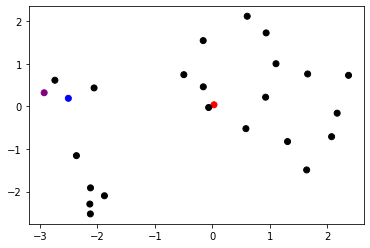

In [115]:
color_plots("CinAld", "IBAcd","CinAld_IBAcd", rho_beta_true_coords)

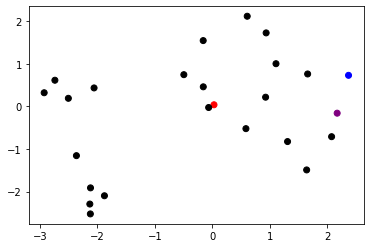

In [116]:
color_plots("CinAld","IVAcd","CinAld_IVAcd", rho_beta_true_coords)

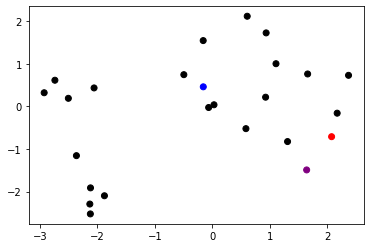

In [117]:
color_plots("EB", "CPAcd", "EB_CPAcd", rho_beta_true_coords)

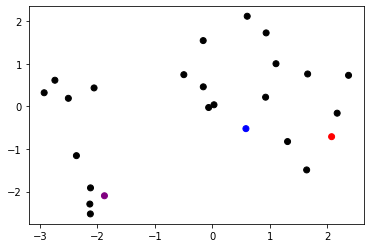

In [118]:
color_plots("EB", "2Hep","EB_2Hep", rho_beta_true_coords)

                       x         y    colors            name
CinAld         -0.002139  2.175134     black          CinAld
EB              2.504400 -3.346053        EB              EB
2MBAcd         -0.826496  0.736516     black          2MBAcd
22DMBAcd       -1.871675  1.143432     black        22DMBAcd
CPAcd          -1.275253  2.028829     black           CPAcd
2Hep            3.001985 -1.714333     black            2Hep
IBAcd           0.255257  0.990451     IBAcd           IBAcd
IVAcd          -1.239223 -0.210409     black           IVAcd
CinAld_CPAcd   -0.652784  2.279035     black    CinAld_CPAcd
CinAld_2Hep     3.217523 -1.473958     black     CinAld_2Hep
CinAld_IBAcd    0.087434  1.710996     black    CinAld_IBAcd
CinAld_IVAcd   -1.664946 -0.629754     black    CinAld_IVAcd
EB_CPAcd        2.481961 -3.680960     black        EB_CPAcd
EB_2Hep         2.677887 -2.682518     black         EB_2Hep
EB_IBAcd        2.355668 -3.506661  EB_IBAcd        EB_IBAcd
EB_IVAcd        2.125037

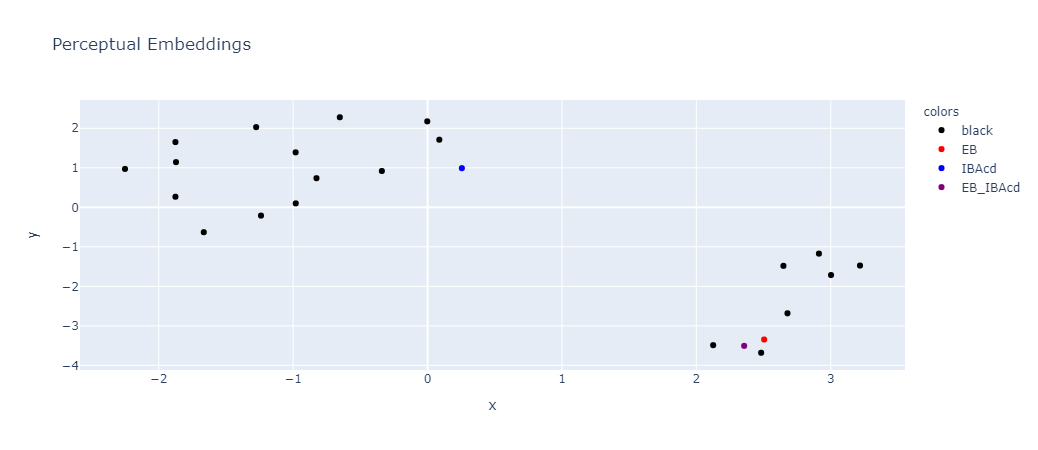

In [177]:
color_plots("EB", "IBAcd","EB_IBAcd", rho_beta_true_coords)

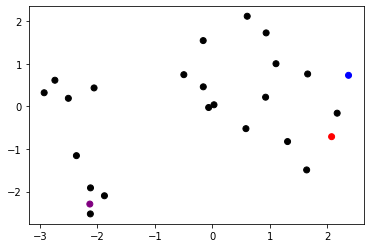

In [120]:
color_plots("EB","IVAcd","EB_IVAcd", rho_beta_true_coords)

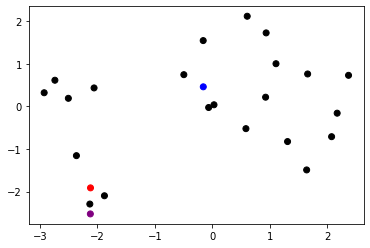

In [121]:
color_plots("2MBAcd","CPAcd","2MBAcd_CPAcd", rho_beta_true_coords)

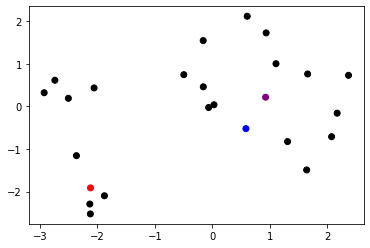

In [122]:
color_plots("2MBAcd","2Hep","2MBAcd_2Hep", rho_beta_true_coords)

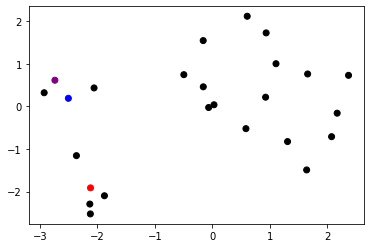

In [123]:
color_plots("2MBAcd","IBAcd", "2MBAcd_IBAcd", rho_beta_true_coords)

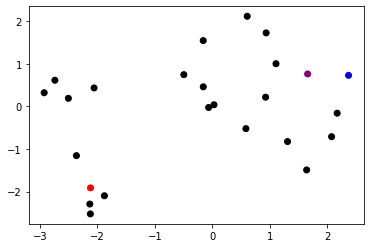

In [124]:
color_plots("2MBAcd","IVAcd","2MBAcd_IVAcd", rho_beta_true_coords)

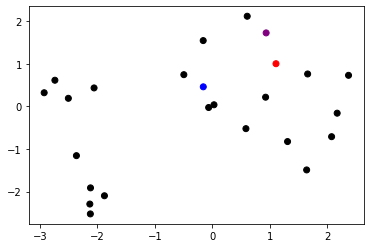

In [125]:
color_plots("22DMBAcd","CPAcd","22DMBAcd_CPAcd", rho_beta_true_coords)

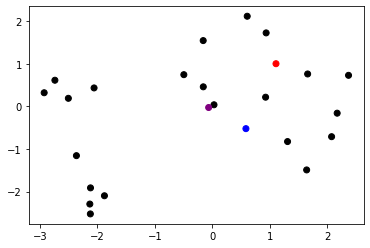

In [126]:
color_plots("22DMBAcd", "2Hep", "22DMBAcd_2Hep", rho_beta_true_coords)

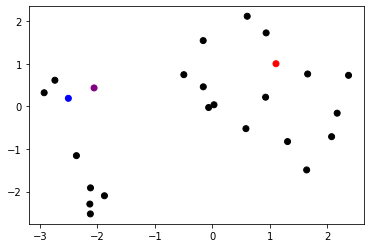

In [127]:
color_plots("22DMBAcd", "IBAcd", "22DMBAcd_IBAcd", rho_beta_true_coords)

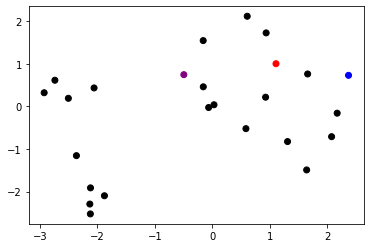

In [128]:
color_plots("22DMBAcd", "IVAcd", "22DMBAcd_IVAcd", rho_beta_true_coords)